In [1]:
import re
import datetime
import pathlib
import polars as pl # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
VERSION = datetime.datetime.now().strftime("%y%m%d")
print(f"Execute Date: {VERSION}")

Execute Date: 251213


## Parameters for papermill

In [3]:
foldseek_result_tsv = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_os_random_9606.tsv")
query_uniprot_idmapping_tsv = pathlib.Path("../test/oryza_sativa_test_202509/rice_random_gene_idmapping_all.tsv")
water_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_water")
needle_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_needle")
query_gene_list_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/oryza_sativa_random_gene_list.tsv")
togoid_convert_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_hit_species_togoid_convert.tsv")

In [4]:
# Parameters
foldseek_result_tsv = "/tmp/roothwj2/stgf5eaa12d-4c40-423e-9f74-296f32e0df64/foldseek_at_100genes_9606_stringent.tsv"
query_uniprot_idmapping_tsv = "/tmp/roothwj2/stge328aa1f-a223-472c-803f-1844acaf8940/at_100_genes_idmapping_all.tsv"
water_result_dir_path = "/tmp/roothwj2/stgbc318cfa-77d8-4587-8a35-f4c301282cf9/result_water"
needle_result_dir_path = "/tmp/roothwj2/stg3482b957-94f5-4c75-aadd-8c95b3312232/result_needle"
query_gene_list_tsv_path = "/tmp/roothwj2/stg9b1e4901-e9fe-452f-a28a-b79677f2301d/arabidopsis_random_100genes_list.tsv"
togoid_convert_tsv_path = "/tmp/roothwj2/stg6dfcef8c-29e1-4108-8d1c-eb7ec3846bb2/foldseek_hit_species_togoid_convert_stringent.tsv"


In [5]:
foldseek_result_df = pl.read_csv(
    foldseek_result_tsv,
    separator='\t'
).with_columns(
    (pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession")), # "?" means non-greedy
    (pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit"))
)

foldseek_result = pl.read_csv(
    query_uniprot_idmapping_tsv, # query idmapping
    separator='\t'
).join(
    foldseek_result_df,
    on="UniProt Accession",
    how="inner",
    coalesce=True
)

display(foldseek_result)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str
"""AT5G57190""","""F4KAK5""","""Q9UG56""",5.5490e-15,1.0,19,23.0,0.23,75,353,624,635,104,408,409,325,0.428,0.746,0.5951,0.3556,0.5377,0.5377,4.477,"""SKIGLRLMDQGAKEILQRLSEKQGKKMSSV…","""GHWEVALYKSVPTRL---LSRAWG-RLNQV…",177,"""0.316,0.393,0.467,0.432,0.426,…"
"""AT5G57190""","""F4KAK5""","""Q96J02""",4.2770e-8,1.0,8,14.1,0.141,22,33,171,635,1,147,903,156,0.219,0.163,0.5875,0.1722,0.1225,0.1225,8.786,"""SSRNSAGMVIQRTVSAEDFS-GIALLTLIG…","""MSDSGSQLGSM----GSLTMKSQLQITVIS…",108,"""0.217,0.354,0.367,0.453,0.673,…"
"""AT5G57190""","""F4KAK5""","""Q6WKZ4""",2.3490e-8,1.0,9,16.7,0.167,28,32,178,635,1,158,1283,167,0.231,0.123,0.5583,0.1757,0.08932,0.08932,9.83,"""RSSRNSAGMVIQRTVSAEDFSGIALLTLIG…","""MSLMVSAGRGLGAVWS----PTHVQVTVLQ…",110,"""0.231,0.233,0.375,0.333,0.438,…"
"""AT5G57190""","""F4KAK5""","""Q7L804""",2.7660e-8,1.0,9,16.0,0.16,26,48,191,635,8,162,512,162,0.227,0.303,0.5409,0.1762,0.2159,0.2159,9.564,"""AEDFSGIALLTLIGAEMKF-------KDKW…","""QKWFPTHVQVTVLQAK-DLKPKGKSGTNDT…",111,"""0.058,0.167,0.173,0.223,0.254,…"
"""AT5G57190""","""F4KAK5""","""Q9HCE7""",9.6860e-8,1.0,9,17.6,0.176,26,43,171,635,3,142,757,147,0.203,0.185,0.5589,0.1744,0.1475,0.1475,3.606,"""QRTVSAEDFSGIALLTLIGAE-------MK…","""NPGTRRNGSSIKIRLTVLCAKNLAKKDFFR…",96,"""0.125,0.186,0.229,0.202,0.257,…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""AT1G56250""","""Q9C7K0""","""Q5TIE3""",0.07026,0.09,10,10.1,0.101,16,132,270,282,19,150,1220,157,0.493,0.108,0.2318,0.1472,0.0484,0.0484,15.2,"""IIT-----DRLEIEGKIQTRVLS--ANTRY…","""DVTSCVSGYALGLTASLT---YGNLEAQPF…",98,"""0.070,0.061,0.083,0.185,0.223,…"
"""AT1G56250""","""Q9C7K0""","""O00189""",0.06636,0.076,10,8.7,0.087,15,98,259,282,290,380,453,171,0.574,0.201,0.2115,0.1384,0.09816,0.09816,10.65,"""VLSARDISITHSDHASYWSWSNVSDSRFSE…","""LPSPLPFRL-------FPSVQWDRGS----…",67,"""0.049,0.051,0.057,0.076,0.113,…"
"""AT1G56250""","""Q9C7K0""","""P09529""",0.09342,0.063,21,7.1,0.071,21,45,282,282,70,284,407,292,0.844,0.528,0.214,0.1902,0.1458,0.1458,17.3,"""LPSD-YKSL----ISQ-----STDHHWNIS…","""VDGDFLEAVKRHILSRLQMRGRPNITHAVP…",140,"""0.110,0.102,0.160,0.138,0.111,…"


&nbsp;

&nbsp;

## Create Scatter Plot for all hits (Strucutural alignment identity vs LDDT)

- Identity in the results of the structural alignment is also output in the foldseek output.
- However, in this notebook, you can also select the results of the pairwise alignment of amino acid sequences (global alignment, local alignment).

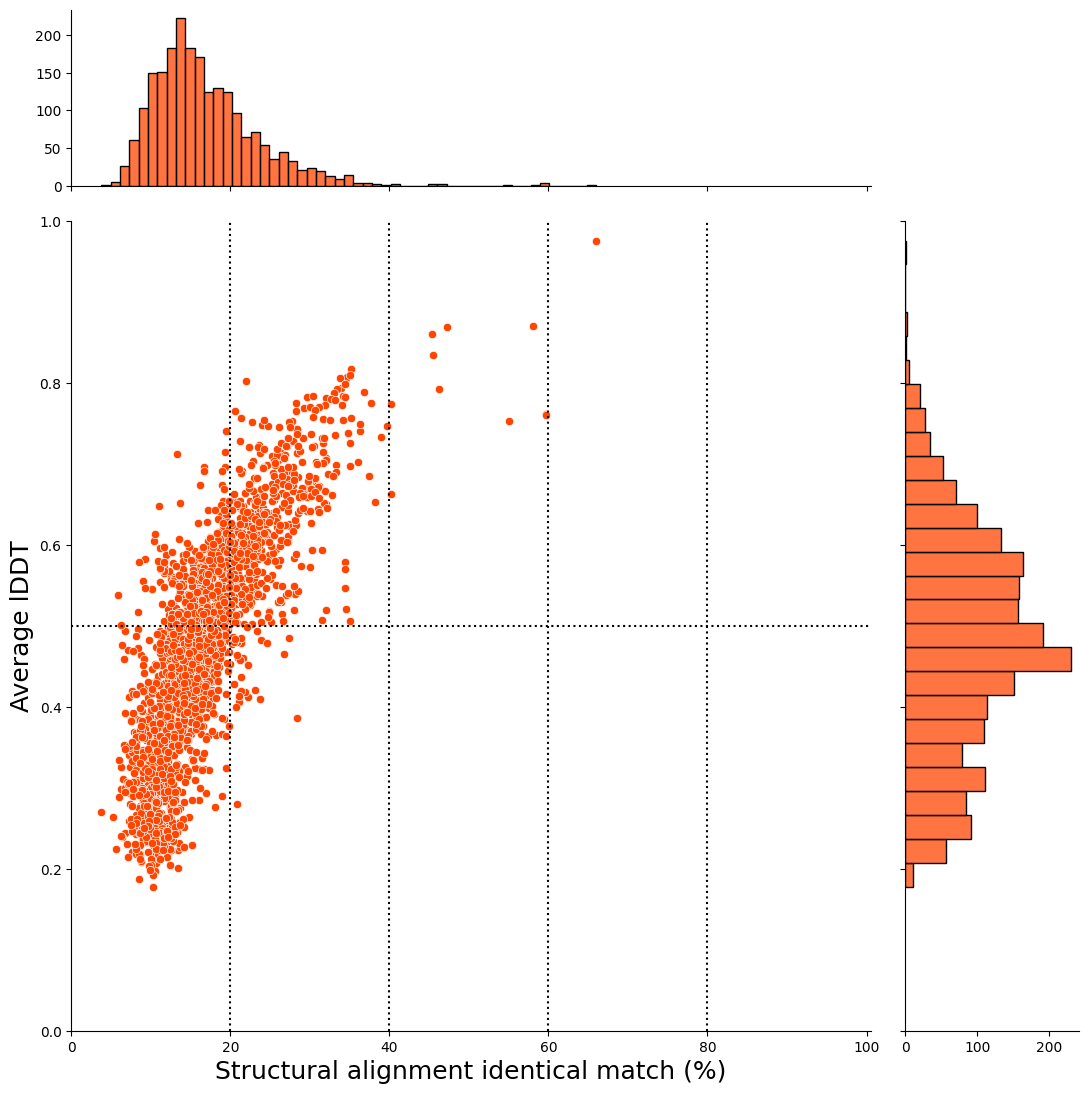

In [6]:
foldseek_filter_viz = foldseek_result.to_pandas()
sns.jointplot(
    data=foldseek_filter_viz,
    x="pident", # structural alignment identical match from foldseek result
    y="lddt",
    color="orangered",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Structural alignment identical match (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Parse pairwise alignment result (water and needle)

In [7]:
def parse_needle_water_result(file_path: str):
    with open(file_path, "r", encoding="utf-8") as file:
        data = file.readlines()
        
    result = {
        "UniProt Accession": None,
        "foldseek hit": None,
        "Length": None,
        "Identity": None,
        "Identity_percent": None,
        "Similarity": None,
        "Similarity_percent": None,
        "Gaps": None,
        "Gaps_percent": None,
        "Score": None
    }
    
    for line in data:
        if line.startswith('# 1:'):
            result['UniProt Accession'] = line.split(':')[1].strip()
        elif line.startswith('# 2:'):
            result['foldseek hit'] = line.split(':')[1].strip()
        elif line.startswith('# Length:'):
            result['Length'] = int(line.split()[2])
        elif line.startswith('# Identity:'):
            result['Identity'] = line.split()[2]
            result['Identity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Similarity:'):
            result['Similarity'] = line.split()[2]
            result['Similarity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Gaps:'):
            result['Gaps'] = line.split()[2]
            result['Gaps_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Score:'):
            result['Score'] = float(line.split()[2])
            
    return result

In [8]:
water_result_dir = pathlib.Path(water_result_dir_path)
needle_result_dir = pathlib.Path(needle_result_dir_path)

# Initialize empty lists to store DataFrames
water_dfs = []
needle_dfs = []

# Collect all water results
for result_file in water_result_dir.glob("*_align.water"):
    parsed_data = parse_needle_water_result(result_file)
    water_dfs.append(pl.DataFrame([parsed_data]))

# Collect all needle results    
for result_file in needle_result_dir.glob("*_align.needle"):
    parsed_data = parse_needle_water_result(result_file)
    needle_dfs.append(pl.DataFrame([parsed_data]))

# Combine all results and sort only if there are results
water_result = (pl.concat(water_dfs, how='vertical')
                .sort(["UniProt Accession", "foldseek hit"]) 
                if water_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

needle_result = (pl.concat(needle_dfs, how='vertical')
                 .sort(["UniProt Accession", "foldseek hit"])
                 if needle_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

display(water_result)
display(needle_result)

UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A7XDQ9""","""A0PJZ3""",276,"""53/276""",19.2,"""90/276""",32.6,"""76/276""",27.5,44.5
"""A7XDQ9""","""A8MXE2""",259,"""63/259""",24.3,"""124/259""",47.9,"""31/259""",12.0,181.5
"""A7XDQ9""","""O43825""",305,"""74/305""",24.3,"""137/305""",44.9,"""59/305""",19.3,234.5
"""A7XDQ9""","""O60271""",199,"""44/199""",22.1,"""73/199""",36.7,"""59/199""",29.6,58.0
"""A7XDQ9""","""O75752""",274,"""72/274""",26.3,"""116/274""",42.3,"""55/274""",20.1,217.0
…,…,…,…,…,…,…,…,…,…
"""Q9ZW35""","""Q16348""",252,"""54/252""",21.4,"""90/252""",35.7,"""94/252""",37.3,48.5
"""Q9ZW35""","""Q66K14""",245,"""47/245""",19.2,"""95/245""",38.8,"""50/245""",20.4,53.0
"""Q9ZW35""","""Q6WBX8""",89,"""24/89""",27.0,"""44/89""",49.4,"""4/89""",4.5,72.0


UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A7XDQ9""","""A0PJZ3""",844,"""73/844""",8.6,"""124/844""",14.7,"""561/844""",66.5,27.5
"""A7XDQ9""","""A8MXE2""",770,"""84/770""",10.9,"""154/770""",20.0,"""487/770""",63.2,163.0
"""A7XDQ9""","""O43825""",786,"""98/786""",12.5,"""172/786""",21.9,"""466/786""",59.3,215.5
"""A7XDQ9""","""O60271""",1533,"""130/1533""",8.5,"""221/1533""",14.4,"""1061/1533""",69.2,30.0
"""A7XDQ9""","""O75752""",757,"""81/757""",10.7,"""135/757""",17.8,"""499/757""",65.9,201.0
…,…,…,…,…,…,…,…,…,…
"""Q9ZW35""","""Q16348""",767,"""70/767""",9.1,"""124/767""",16.2,"""541/767""",70.5,35.5
"""Q9ZW35""","""Q66K14""",1302,"""61/1302""",4.7,"""104/1302""",8.0,"""1090/1302""",83.7,41.5
"""Q9ZW35""","""Q6WBX8""",449,"""61/449""",13.6,"""116/449""",25.8,"""208/449""",46.3,71.0


In [9]:
alignment_result = water_result.join(
    needle_result,
    on=["UniProt Accession", "foldseek hit"],
    how="inner",
    coalesce=True,
    suffix="_needle"
).rename(
    {
        "Length": "Length_water",
        "Identity": "Identity_water",
        "Identity_percent": "Identity_percent_water",
        "Similarity": "Similarity_water",
        "Similarity_percent": "Similarity_percent_water",
        "Gaps": "Gaps_water",
        "Gaps_percent": "Gaps_percent_water",
        "Score": "Score_water"
    }
).select(
    [
        "UniProt Accession",
        "foldseek hit",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_needle",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_needle",
        "Gaps_percent_water",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
)

display(alignment_result)

UniProt Accession,foldseek hit,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""A7XDQ9""","""A0PJZ3""",276,844,"""53/276""","""73/844""",19.2,8.6,32.6,14.7,"""76/276""","""561/844""",27.5,66.5,44.5,27.5
"""A7XDQ9""","""A8MXE2""",259,770,"""63/259""","""84/770""",24.3,10.9,47.9,20.0,"""31/259""","""487/770""",12.0,63.2,181.5,163.0
"""A7XDQ9""","""O43825""",305,786,"""74/305""","""98/786""",24.3,12.5,44.9,21.9,"""59/305""","""466/786""",19.3,59.3,234.5,215.5
"""A7XDQ9""","""O60271""",199,1533,"""44/199""","""130/1533""",22.1,8.5,36.7,14.4,"""59/199""","""1061/1533""",29.6,69.2,58.0,30.0
"""A7XDQ9""","""O75752""",274,757,"""72/274""","""81/757""",26.3,10.7,42.3,17.8,"""55/274""","""499/757""",20.1,65.9,217.0,201.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Q9ZW35""","""Q16348""",252,767,"""54/252""","""70/767""",21.4,9.1,35.7,16.2,"""94/252""","""541/767""",37.3,70.5,48.5,35.5
"""Q9ZW35""","""Q66K14""",245,1302,"""47/245""","""61/1302""",19.2,4.7,38.8,8.0,"""50/245""","""1090/1302""",20.4,83.7,53.0,41.5
"""Q9ZW35""","""Q6WBX8""",89,449,"""24/89""","""61/449""",27.0,13.6,49.4,25.8,"""4/89""","""208/449""",4.5,46.3,72.0,71.0


&nbsp;


&nbsp;

## Integrate foldseek result and pairwise alignment result

- This time, **exclude the ones that are null in pairwise alignment result, which means the current UniProt entry is obsolete**

In [10]:
join_foldseek = foldseek_result.join(
    alignment_result,
    on=["UniProt Accession", "foldseek hit"],
    how="left",
    coalesce=True
).filter( # filter out null alignment result (this means current UniProt entry is obsolete)
    pl.col("Length_water").is_not_null() & 
    pl.col("Length_needle").is_not_null()
).unique()


print(join_foldseek.group_by(["UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(join_foldseek.head())

shape: (1_997, 41)
┌─────────────┬────────────┬──────┬────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ UniProt     ┆ foldseek   ┆ From ┆ evalue ┆ … ┆ Gaps_perce ┆ Gaps_perce ┆ Score_wate ┆ Score_need │
│ Accession   ┆ hit        ┆ ---  ┆ ---    ┆   ┆ nt_water   ┆ nt_needle  ┆ r          ┆ le         │
│ ---         ┆ ---        ┆ u32  ┆ u32    ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str         ┆ str        ┆      ┆        ┆   ┆ u32        ┆ u32        ┆ u32        ┆ u32        │
╞═════════════╪════════════╪══════╪════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ Q9FID8      ┆ Q13470     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ B3H754      ┆ O94941     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q9LR78      ┆ Q9H7D7     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q38997      ┆ Q13976     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1         

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""AT5G39000""","""Q9FID8""","""Q13470""",1.0620e-14,1.0,15,23.2,0.232,78,469,796,873,88,380,666,335,0.376,0.44,0.6122,0.2769,0.3574,0.3574,14.62,"""KKKSKPSTNSSWCPLPHGTDSTNTKPAKSL…","""KEPTLPSDSPRHLPEPEG------------…",208,"""0.333,0.312,0.545,0.694,0.722,…",554,1123,"""127/554""","""131/1123""",22.9,11.7,35.0,18.1,"""157/554""","""707/1123""",28.3,63.0,189.0,185.5
"""AT2G38220""","""B3H754""","""O94941""",0.01894,0.15,18,9.7,0.097,35,113,400,404,10,320,541,359,0.713,0.575,0.348,0.1188,0.09052,0.09052,31.78,"""FVNWTESRVLS-------------------…","""FRPRIHCNKISADGYEVENLISEDLTKRSH…",205,"""0.122,0.140,0.192,0.179,0.172,…",243,716,"""54/243""","""71/716""",22.2,9.9,34.2,15.6,"""84/243""","""487/716""",34.6,68.0,52.0,33.5
"""AT1G03445""","""Q9LR78""","""Q9H7D7""",0.0004981,0.992,38,8.5,0.085,33,22,355,793,338,648,661,388,0.421,0.47,0.3319,0.2304,0.2686,0.2686,11.39,"""DTDEDWPGPR------CGHTL-TAVFVNN-…","""CSRRQFPCYTQQILTEHCNEVWFCKFSNDG…",224,"""0.307,0.307,0.310,0.211,0.177,…",263,972,"""57/263""","""140/972""",21.7,14.4,34.2,22.8,"""69/263""","""490/972""",26.2,50.4,69.5,48.0
"""AT3G01090""","""Q38997""","""Q13976""",2.6030e-22,1.0,7,28.2,0.282,87,2,284,512,330,635,671,308,0.553,0.456,0.7655,0.4988,0.3825,0.3825,11.42,"""DGSGTGSRSGVESI-------------LPN…","""DVSNKAYEDAEAKAKYEAEAAFFANLKLSD…",194,"""0.550,0.750,0.719,0.600,0.591,…",282,892,"""86/282""","""94/892""",30.5,10.5,52.1,17.3,"""17/282""","""601/892""",6.0,67.4,374.5,364.5
"""AT1G65250""","""O80795""","""Q16566""",1.7040e-7,1.0,30,17.0,0.17,67,38,372,372,31,367,473,394,0.901,0.712,0.4144,0.4228,0.3451,0.3451,25.14,"""KFFSADEILKATNDFSDSNF--VLRLEV--…","""DYWID----GSNRD-ALSDFFEVESELGRG…",211,"""0.137,0.203,0.221,0.333,0.188,…",255,545,"""56/255""","""79/545""",22.0,14.5,38.0,25.3,"""61/255""","""245/545""",23.9,45.0,84.0,65.5


&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Create Scatter Plot for all hits (x-axis: Similarity_percent_needle) Global alignment

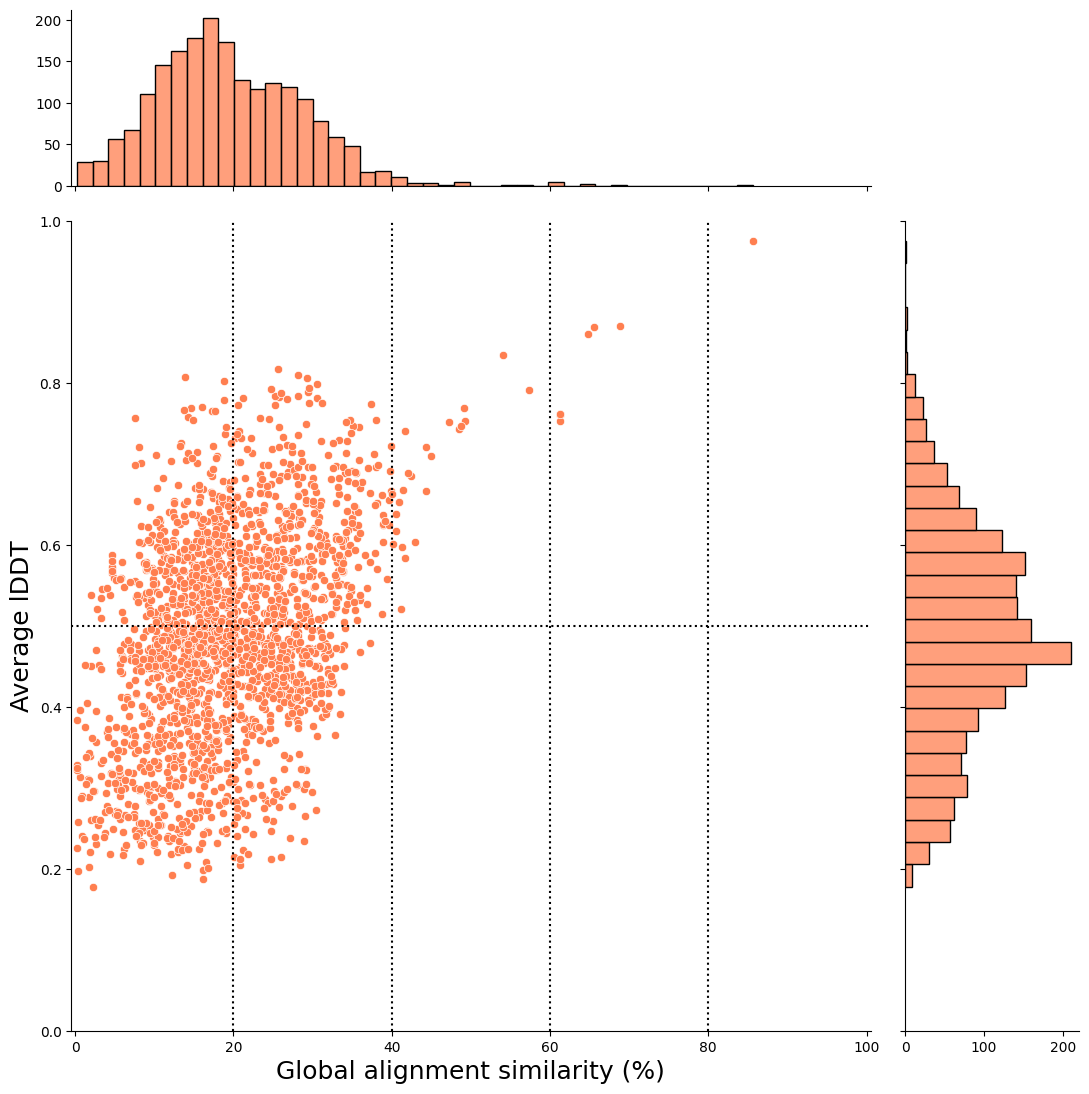

In [11]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100.5)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;


## Create Scatter Plot for all hits (x-axis: Similarity_percent_water) Local Alignment

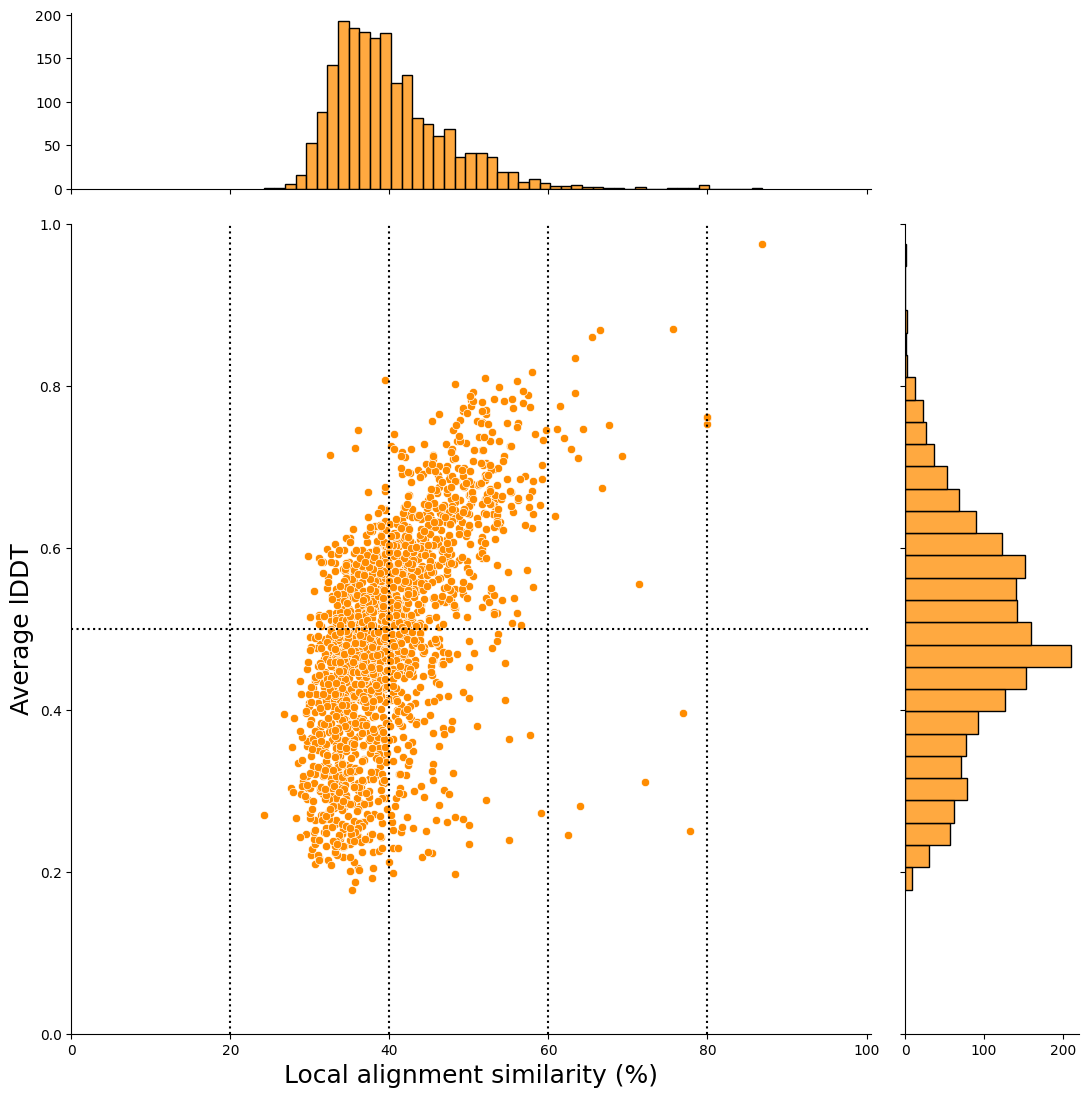

In [12]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_water", # local alignment similarity
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Counting foldseek hits in Gene level

In [13]:
all_gene_list = pl.read_csv(
    query_gene_list_tsv_path,
    separator='\t'
).select(
    "From"
).unique()

hit_count = all_gene_list.join(
    join_foldseek,
    on="From",
    how="left",
    coalesce=True
).group_by("From", maintain_order=True).agg(
    (pl.col("foldseek hit").count().alias("target hit count (gene level vs uniprot accession)")),
    (pl.col("foldseek hit").is_null().all().alias("foldseek no hit"))
).sort(
    ["target hit count (gene level vs uniprot accession)"], descending=True
)

display(hit_count)

From,target hit count (gene level vs uniprot accession),foldseek no hit
str,u32,bool
"""AT1G65250""",378,false
"""AT3G01090""",327,false
"""AT5G57190""",180,false
"""AT5G39000""",178,false
"""AT3G05360""",146,false
…,…,…
"""AT1G78400""",0,true
"""AT1G72500""",0,true
"""AT5G36810""",0,true


&nbsp;

&nbsp;

&nbsp;

# Caution:
- The filtering steps that are executed below can be changed freely.

&nbsp;

## Filtering Condition1

- alignment coverage >= 0.5

In [14]:
condition1 = join_foldseek.filter(
        (pl.col("qcov") >= 0.5) &
        (pl.col("tcov") >= 0.5)
    ).sort(
        by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession
        descending=[False, False, False]
    )

condition1_rm = condition1.filter(
        (pl.col("qcov") < 0.5) |
        (pl.col("tcov") < 0.5)
    )

print(condition1.group_by(["From"], maintain_order=True).n_unique())
display(condition1)

shape: (24, 41)
┌───────────┬────────────┬────────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ From      ┆ UniProt    ┆ foldseek   ┆ evalue ┆ … ┆ Gaps_perc ┆ Gaps_perc ┆ Score_wat ┆ Score_nee │
│ ---       ┆ Accession  ┆ hit        ┆ ---    ┆   ┆ ent_water ┆ ent_needl ┆ er        ┆ dle       │
│ str       ┆ ---        ┆ ---        ┆ u32    ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---       │
│           ┆ u32        ┆ u32        ┆        ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32       │
│           ┆            ┆            ┆        ┆   ┆           ┆ u32       ┆           ┆           │
╞═══════════╪════════════╪════════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ AT1G03445 ┆ 1          ┆ 1          ┆ 1      ┆ … ┆ 1         ┆ 1         ┆ 1         ┆ 1         │
│ AT1G31770 ┆ 1          ┆ 7          ┆ 7      ┆ … ┆ 7         ┆ 7         ┆ 7         ┆ 7         │
│ AT1G50510 ┆ 1          ┆ 5          ┆ 5      ┆ … ┆ 5         ┆ 5         

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""AT1G03445""","""Q9LR78""","""Q8TDY8""",0.008806,0.029,49,10.5,0.105,77,26,476,793,425,1103,1250,736,0.569,0.543,0.2548,0.04944,0.03606,0.03606,51.65,"""DWPGPRCGHT-LTAVFVNNSHQLILF----…","""REGLPSA-PTRVTATPLSSS-AVLVAWERP…",317,"""0.110,0.130,0.090,0.150,0.148,…",839,1416,"""169/839""","""172/1416""",20.1,12.1,32.8,20.1,"""259/839""","""789/1416""",30.9,55.7,60.5,41.0
"""AT1G31770""","""Q9C6W5""","""P06576""",0.05192,0.411,28,9.0,0.09,49,1,344,648,11,500,529,540,0.531,0.926,0.3437,0.1622,0.1929,0.1929,25.55,"""MPQNCIAPRPEEDGGVMVQGLPDMSDTQSK…","""APASGALRRLTPSASLPPAQL--LLRAAPT…",245,"""0.875,0.850,0.958,0.821,0.844,…",329,898,"""72/329""","""92/898""",21.9,10.2,33.1,16.0,"""120/329""","""619/898""",36.5,68.9,81.5,62.5
"""AT1G31770""","""Q9C6W5""","""P13569""",3.8040e-7,1.0,39,13.2,0.132,112,52,647,648,391,1155,1480,848,0.92,0.517,0.377,0.3137,0.1489,0.1489,23.19,"""TLKFEEVVYKVKI-----------------…","""EVVMENVT---AFWEEGFGELFEKAKQNNN…",401,"""0.417,0.544,0.571,0.606,0.569,…",643,1562,"""123/643""","""148/1562""",19.1,9.5,34.7,18.0,"""221/643""","""996/1562""",34.4,63.8,189.5,165.5
"""AT1G31770""","""Q9C6W5""","""P45844""",7.3300e-41,1.0,21,28.4,0.284,192,9,643,648,24,671,678,675,0.98,0.956,0.7432,0.7915,0.7582,0.7582,12.58,"""RPEEDGGVMVQGLPDMSDTQSKSVLAFPTI…","""TEPKSVCVSVDEVVSSNMEATETDLLNGHL…",416,"""0.375,0.406,0.500,0.625,0.656,…",624,713,"""197/624""","""203/713""",31.6,28.5,52.9,48.5,"""49/624""","""100/713""",7.9,14.0,816.0,803.0
"""AT1G31770""","""Q9C6W5""","""Q9H172""",6.4400e-41,1.0,21,27.7,0.277,188,11,643,648,7,639,646,677,0.977,0.98,0.7533,0.7875,0.7899,0.7899,14.24,"""EEDGGVMVQGLPDMSDTQSKSVLAFPTITS…","""EAVGCGLGPGAVAMAVTLEDGA-EPPVLTT…",401,"""0.344,0.438,0.625,0.531,0.875,…",622,688,"""189/622""","""198/688""",30.4,28.8,52.4,49.3,"""63/622""","""82/688""",10.1,11.9,782.0,768.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""AT5G63380""","""Q84P23""","""Q9UKU0""",3.4220e-36,1.0,23,17.1,0.171,109,28,560,562,79,691,697,636,0.948,0.879,0.6281,0.7977,0.6515,0.6515,4.349,"""RPSLSLPPIDQPLSAAEFALSLLLKSSPPA…","""PQLLTHYYDDAR-TMYQ-VFRRGLSISGNG…",401,"""0.215,0.286,0.419,0.411,0.353,…",505,772,"""121/505""","""150/772""",24.0,19.4,38.8,30.7,"""111/505""","""285/772""",22.0,36.9,223.0,197.5
"""AT5G63380""","""Q84P23""","""Q9ULC5""",1.2260e-34,1.0,30,17.5,0.175,111,29,560,562,65,676,683,637,0.947,0.896,0.6078,0.7765,0.6461,0.6461,5.769,"""PSLSLPPIDQPLSAAEFALSLLLKSSPPAT…","""DLTSCCFSD-AKTMYE-VFQRGLAVSD---…",396,"""0.256,0.463,0.464,0.346,0.537,…",540,757,"""124/540""","""148/757""",23.0,19.6,39.3,33.0,"""130/540""","""269/757""",24.1,35.5,242.0,224.5
"""AT5G63380""","""Q84P23""","""Q9Y2P4""",1.1650e-33,1.0,25,20.1,0.201,113,40,558,562,54,585,619,560,0.923,0.859,0.5996,0.6303,0.5764,0.5764,11.27,"""LSAAEFALSLLLKSSPPATAGKNIEALTYL…","""VTVLDKFLS-HAKRQP---------RKPFI…",378,"""0.436,0.425,0.426,0.546,0.464,…",543,692,"""121/543""","""133/692""",22.3,19.2,39.6,34.7,"""98/543""","""203/692""",18.0,29.3,230.0,209.0


&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Filtering Condition2

- If there are hits with the same target for the same gene-derived UniProt ID, the one with the highest qcov is selected, and if the qcov is the same, the one with the highest lDDT is selected.
- **Note that in this study, we leave the states with the same foldseek hit even if the rice genes are different.**

In [15]:
condition2 = condition1.sort(
    by=["qcov", "lddt"],
    descending=[True, True]
).group_by(
    ["From", "foldseek hit"],
    maintain_order=True
).agg(
    pl.all().first()
).sort(
    by=["From", "UniProt Accession", "foldseek hit"],
    descending=[False, False, False]
).select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "evalue",
    "prob",
    "gapopen",
    "pident",
    "fident",
    "nident",
    "qstart",
    "qend",
    "qlen",
    "tstart",
    "tend",
    "tlen",
    "alnlen",
    "qcov",
    "tcov",
    "lddt",
    "qtmscore",
    "ttmscore",
    "alntmscore",
    "rmsd",
    "mismatch",
    "Length_water",
    "Length_needle",
    "Identity_water",
    "Identity_needle",
    "Identity_percent_water",
    "Identity_percent_needle",
    "Similarity_percent_water",
    "Similarity_percent_needle",
    "Gaps_water",
    "Gaps_percent_water",
    "Gaps_needle",
    "Gaps_percent_needle",
    "Score_water",
    "Score_needle"
)

display(condition2)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,mismatch,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,str,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""AT1G03445""","""Q9LR78""","""Q8TDY8""",0.008806,0.029,49,10.5,0.105,77,26,476,793,425,1103,1250,736,0.569,0.543,0.2548,0.04944,0.03606,0.03606,51.65,317,839,1416,"""169/839""","""172/1416""",20.1,12.1,32.8,20.1,"""259/839""",30.9,"""789/1416""",55.7,60.5,41.0
"""AT1G31770""","""Q9C6W5""","""P06576""",0.05192,0.411,28,9.0,0.09,49,1,344,648,11,500,529,540,0.531,0.926,0.3437,0.1622,0.1929,0.1929,25.55,245,329,898,"""72/329""","""92/898""",21.9,10.2,33.1,16.0,"""120/329""",36.5,"""619/898""",68.9,81.5,62.5
"""AT1G31770""","""Q9C6W5""","""P13569""",3.8040e-7,1.0,39,13.2,0.132,112,52,647,648,391,1155,1480,848,0.92,0.517,0.377,0.3137,0.1489,0.1489,23.19,401,643,1562,"""123/643""","""148/1562""",19.1,9.5,34.7,18.0,"""221/643""",34.4,"""996/1562""",63.8,189.5,165.5
"""AT1G31770""","""Q9C6W5""","""P45844""",7.3300e-41,1.0,21,28.4,0.284,192,9,643,648,24,671,678,675,0.98,0.956,0.7432,0.7915,0.7582,0.7582,12.58,416,624,713,"""197/624""","""203/713""",31.6,28.5,52.9,48.5,"""49/624""",7.9,"""100/713""",14.0,816.0,803.0
"""AT1G31770""","""Q9C6W5""","""Q9H172""",6.4400e-41,1.0,21,27.7,0.277,188,11,643,648,7,639,646,677,0.977,0.98,0.7533,0.7875,0.7899,0.7899,14.24,401,622,688,"""189/622""","""198/688""",30.4,28.8,52.4,49.3,"""63/622""",10.1,"""82/688""",11.9,782.0,768.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""AT5G63380""","""Q84P23""","""Q9UKU0""",3.4220e-36,1.0,23,17.1,0.171,109,28,560,562,79,691,697,636,0.948,0.879,0.6281,0.7977,0.6515,0.6515,4.349,401,505,772,"""121/505""","""150/772""",24.0,19.4,38.8,30.7,"""111/505""",22.0,"""285/772""",36.9,223.0,197.5
"""AT5G63380""","""Q84P23""","""Q9ULC5""",1.2260e-34,1.0,30,17.5,0.175,111,29,560,562,65,676,683,637,0.947,0.896,0.6078,0.7765,0.6461,0.6461,5.769,396,540,757,"""124/540""","""148/757""",23.0,19.6,39.3,33.0,"""130/540""",24.1,"""269/757""",35.5,242.0,224.5
"""AT5G63380""","""Q84P23""","""Q9Y2P4""",1.1650e-33,1.0,25,20.1,0.201,113,40,558,562,54,585,619,560,0.923,0.859,0.5996,0.6303,0.5764,0.5764,11.27,378,543,692,"""121/543""","""133/692""",22.3,19.2,39.6,34.7,"""98/543""",18.0,"""203/692""",29.3,230.0,209.0


&nbsp;

&nbsp;

&nbsp;

## Filtering Condition3

- Select hits that can be converted to Ensembl gene id and HGNC Gene nomenclature with TogoID API
- https://togoid.dbcls.jp/

In [16]:
togoid_convert = pl.read_csv(
    togoid_convert_tsv_path,
    separator='\t'
).rename(
    {
        "uniprot_id" : "foldseek hit"
    }
).filter(
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).sort(
    by=["foldseek hit"],
    descending=[False]
)

display(togoid_convert)

foldseek hit,ensembl_protein_id,ensembl_transcript_id,ensembl_gene_id,hgnc_id,hgnc_symbol_id
str,str,str,str,i64,str
"""A0A1B0GWK0""","""ENSP00000490956""","""ENST00000637878""","""ENSG00000225180""",40053,"""PVALEF"""
"""A0A1W2PR95""","""ENSP00000492384""","""ENST00000583666""","""ENSG00000266826""",43611,"""IGBP1C"""
"""A0AAG2UUX9""","""ENSP00000516836""","""ENST00000707310""","""ENSG00000291365""",53878,"""CNTNAP3C"""
"""A0AVI2""","""ENSP00000485238""","""ENST00000624922""","""ENSG00000249715""",19044,"""FER1L5"""
"""A0FGR8""","""ENSP00000499020""","""ENST00000652148""","""ENSG00000117868""",22211,"""ESYT2"""
…,…,…,…,…,…
"""Q9Y6V0""","""ENSP00000388393""","""ENST00000423517""","""ENSG00000186472""",13406,"""PCLO"""
"""Q9Y6V0""","""ENSP00000482390""","""ENST00000618073""","""ENSG00000186472""",13406,"""PCLO"""
"""Q9Y6V7""","""ENSP00000247003""","""ENST00000247003""","""ENSG00000105671""",18684,"""DDX49"""


In [17]:
condition3 = condition2.join(
    togoid_convert,
    on="foldseek hit",
    how="left",
    coalesce=True
).drop(
    [
        "ensembl_transcript_id",
        "hgnc_id"
    ]
).filter( 
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).select(
    [
        "From",
        "UniProt Accession",
        "foldseek hit",
        "ensembl_protein_id",
        "ensembl_gene_id",
        "hgnc_symbol_id",
        "evalue",
        "prob",
        "gapopen",
        "pident",
        "fident",
        "nident",
        "qstart",
        "qend",
        "qlen",
        "tstart",
        "tend",
        "tlen",
        "alnlen",
        "mismatch",
        "qcov",
        "tcov",
        "rmsd",
        "lddt",
        "qtmscore",
        "ttmscore",
        "alntmscore",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_percent_water",
        "Gaps_needle",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
).sort(
    by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession (change order)
    descending=[False, False, False]
)



print(condition3.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(condition3)


shape: (755, 40)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ From      ┆ UniProt   ┆ foldseek  ┆ ensembl_p ┆ … ┆ Gaps_need ┆ Gaps_perc ┆ Score_wat ┆ Score_ne │
│ ---       ┆ Accession ┆ hit       ┆ rotein_id ┆   ┆ le        ┆ ent_needl ┆ er        ┆ edle     │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---      │
│           ┆ str       ┆ str       ┆ u32       ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32      │
│           ┆           ┆           ┆           ┆   ┆           ┆ u32       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ AT1G03445 ┆ Q9LR78    ┆ Q8TDY8    ┆ 1         ┆ … ┆ 1         ┆ 1         ┆ 1         ┆ 1        │
│ AT1G31770 ┆ Q9C6W5    ┆ P06576    ┆ 1         ┆ … ┆ 1         ┆ 1         ┆ 1         ┆ 1        │
│ AT1G31770 ┆ Q9C6W5    ┆ P13569    ┆ 2         ┆ … ┆ 1         ┆ 1       

From,UniProt Accession,foldseek hit,ensembl_protein_id,ensembl_gene_id,hgnc_symbol_id,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,mismatch,qcov,tcov,rmsd,lddt,qtmscore,ttmscore,alntmscore,Length_water,Length_needle,Identity_water,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""AT1G03445""","""Q9LR78""","""Q8TDY8""","""ENSP00000319623""","""ENSG00000103742""","""IGDCC4""",0.008806,0.029,49,10.5,0.105,77,26,476,793,425,1103,1250,736,317,0.569,0.543,51.65,0.2548,0.04944,0.03606,0.03606,839,1416,"""169/839""",20.1,12.1,32.8,20.1,"""259/839""",30.9,"""789/1416""",55.7,60.5,41.0
"""AT1G31770""","""Q9C6W5""","""P06576""","""ENSP00000262030""","""ENSG00000110955""","""ATP5F1B""",0.05192,0.411,28,9.0,0.09,49,1,344,648,11,500,529,540,245,0.531,0.926,25.55,0.3437,0.1622,0.1929,0.1929,329,898,"""72/329""",21.9,10.2,33.1,16.0,"""120/329""",36.5,"""619/898""",68.9,81.5,62.5
"""AT1G31770""","""Q9C6W5""","""P13569""","""ENSP00000003084""","""ENSG00000001626""","""CFTR""",3.8040e-7,1.0,39,13.2,0.132,112,52,647,648,391,1155,1480,848,401,0.92,0.517,23.19,0.377,0.3137,0.1489,0.1489,643,1562,"""123/643""",19.1,9.5,34.7,18.0,"""221/643""",34.4,"""996/1562""",63.8,189.5,165.5
"""AT1G31770""","""Q9C6W5""","""P13569""","""ENSP00000497203""","""ENSG00000001626""","""CFTR""",3.8040e-7,1.0,39,13.2,0.132,112,52,647,648,391,1155,1480,848,401,0.92,0.517,23.19,0.377,0.3137,0.1489,0.1489,643,1562,"""123/643""",19.1,9.5,34.7,18.0,"""221/643""",34.4,"""996/1562""",63.8,189.5,165.5
"""AT1G31770""","""Q9C6W5""","""P45844""","""ENSP00000339744""","""ENSG00000160179""","""ABCG1""",7.3300e-41,1.0,21,28.4,0.284,192,9,643,648,24,671,678,675,416,0.98,0.956,12.58,0.7432,0.7915,0.7582,0.7582,624,713,"""197/624""",31.6,28.5,52.9,48.5,"""49/624""",7.9,"""100/713""",14.0,816.0,803.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""AT5G63380""","""Q84P23""","""Q9Y2P4""","""ENSP00000378684""","""ENSG00000113396""","""SLC27A6""",1.1650e-33,1.0,25,20.1,0.201,113,40,558,562,54,585,619,560,378,0.923,0.859,11.27,0.5996,0.6303,0.5764,0.5764,543,692,"""121/543""",22.3,19.2,39.6,34.7,"""98/543""",18.0,"""203/692""",29.3,230.0,209.0
"""AT5G63380""","""Q84P23""","""Q9Y2P4""","""ENSP00000421024""","""ENSG00000113396""","""SLC27A6""",1.1650e-33,1.0,25,20.1,0.201,113,40,558,562,54,585,619,560,378,0.923,0.859,11.27,0.5996,0.6303,0.5764,0.5764,543,692,"""121/543""",22.3,19.2,39.6,34.7,"""98/543""",18.0,"""203/692""",29.3,230.0,209.0
"""AT5G63380""","""Q84P23""","""Q9Y2P5""","""ENSP00000263093""","""ENSG00000083807""","""SLC27A5""",5.8650e-33,1.0,24,20.4,0.204,116,41,552,562,115,650,690,567,365,0.911,0.777,11.34,0.5892,0.6082,0.5041,0.5041,632,776,"""155/632""",24.5,19.7,38.1,31.6,"""153/632""",24.2,"""300/776""",38.7,301.5,281.5


&nbsp;

&nbsp;


In [18]:
foldseek_filter_viz = condition3.select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "qcov",
    "tcov",
    "rmsd",
    "lddt",
    "Identity_percent_needle",
    "Identity_percent_water",
    "Similarity_percent_needle",
    "Similarity_percent_water"
).unique(
    subset=["From", "UniProt Accession", "foldseek hit"]
).sort(
    by=["From"],
    descending=[False]
)

print(foldseek_filter_viz.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(foldseek_filter_viz)

shape: (755, 11)
┌───────────┬────────────┬────────────┬──────┬───┬────────────┬────────────┬───────────┬───────────┐
│ From      ┆ UniProt    ┆ foldseek   ┆ qcov ┆ … ┆ Identity_p ┆ Identity_p ┆ Similarit ┆ Similarit │
│ ---       ┆ Accession  ┆ hit        ┆ ---  ┆   ┆ ercent_nee ┆ ercent_wat ┆ y_percent ┆ y_percent │
│ str       ┆ ---        ┆ ---        ┆ u32  ┆   ┆ dle        ┆ er         ┆ _needle   ┆ _water    │
│           ┆ str        ┆ str        ┆      ┆   ┆ ---        ┆ ---        ┆ ---       ┆ ---       │
│           ┆            ┆            ┆      ┆   ┆ u32        ┆ u32        ┆ u32       ┆ u32       │
╞═══════════╪════════════╪════════════╪══════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
│ AT1G03445 ┆ Q9LR78     ┆ Q8TDY8     ┆ 1    ┆ … ┆ 1          ┆ 1          ┆ 1         ┆ 1         │
│ AT1G31770 ┆ Q9C6W5     ┆ Q9UNQ0     ┆ 1    ┆ … ┆ 1          ┆ 1          ┆ 1         ┆ 1         │
│ AT1G31770 ┆ Q9C6W5     ┆ P45844     ┆ 1    ┆ … ┆ 1          ┆ 1         

From,UniProt Accession,foldseek hit,qcov,tcov,rmsd,lddt,Identity_percent_needle,Identity_percent_water,Similarity_percent_needle,Similarity_percent_water
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""AT1G03445""","""Q9LR78""","""Q8TDY8""",0.569,0.543,51.65,0.2548,12.1,20.1,20.1,32.8
"""AT1G31770""","""Q9C6W5""","""Q9UNQ0""",0.975,0.997,7.376,0.7686,31.6,33.5,49.1,51.7
"""AT1G31770""","""Q9C6W5""","""P45844""",0.98,0.956,12.58,0.7432,28.5,31.6,48.5,52.9
"""AT1G31770""","""Q9C6W5""","""P13569""",0.92,0.517,23.19,0.377,9.5,19.1,18.0,34.7
"""AT1G31770""","""Q9C6W5""","""Q9H222""",0.981,0.983,6.709,0.7091,27.3,30.5,44.9,48.0
…,…,…,…,…,…,…,…,…,…,…
"""AT5G63380""","""Q84P23""","""Q4G176""",0.94,0.948,6.347,0.6167,23.5,25.6,40.5,44.2
"""AT5G63380""","""Q84P23""","""Q9H0I9""",0.577,0.594,18.77,0.2486,7.8,18.7,12.8,31.8
"""AT5G63380""","""Q84P23""","""P51854""",0.649,0.742,19.01,0.2446,2.2,18.9,3.7,33.8


<Figure size 4000x4000 with 0 Axes>

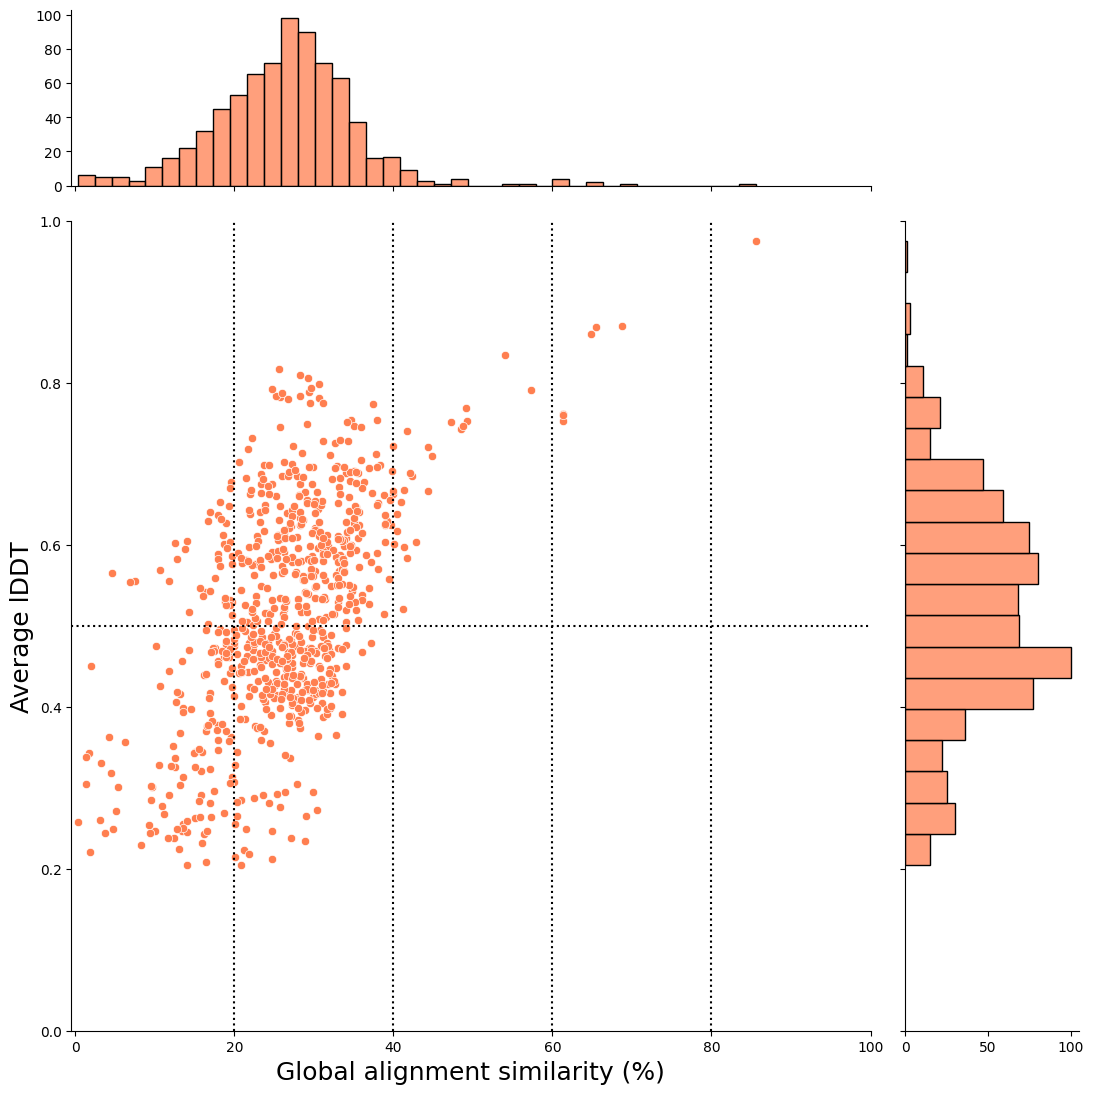

In [19]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

<Figure size 4000x4000 with 0 Axes>

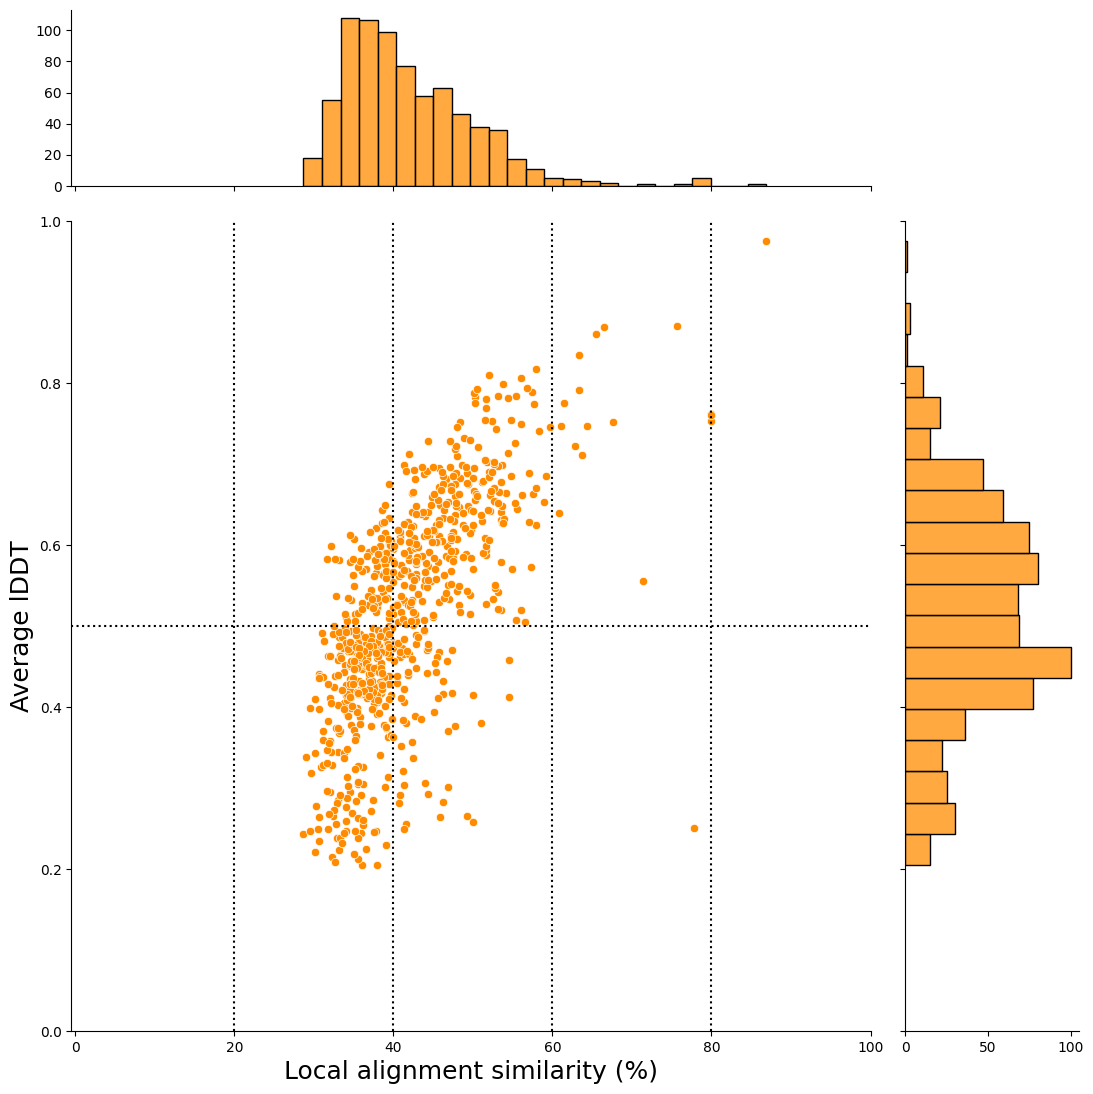

In [20]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_water",
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")

plt.axhline(y=0.5, color="black", linestyle=":")
plt.show()

&nbsp;

&nbsp;
